# Tratamento de missings

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

# Criando dados com missings
data = {
    'idade': [25, 30, np.nan, 35, 40, np.nan, 28],
    'salario': [5000, np.nan, 7000, 8000, np.nan, 6000, 5500],
    'departamento': ['TI', 'RH', 'TI', np.nan, 'Vendas', 'TI', 'RH']
}

df = pd.DataFrame(data)
print("Dados originais com missings:")
print(df)

# Métodos de tratamento
# 1. Remoção
df_remocao = df.dropna()
print("\nApós remoção de linhas com missings:")
print(df_remocao)

# 2. Imputação com média/moda
imputer_media = SimpleImputer(strategy='mean')
imputer_moda = SimpleImputer(strategy='most_frequent')

df['idade_imputada'] = imputer_media.fit_transform(df[['idade']])
df['departamento_imputado'] = imputer_moda.fit_transform(df[['departamento']])

# 3. Imputação com KNN
imputer_knn = KNNImputer(n_neighbors=2)
df[['salario_imputado']] = imputer_knn.fit_transform(df[['salario']])

print("\nApós imputação:")
print(df[['idade_imputada', 'salario_imputado', 'departamento_imputado']])

c:\Users\Lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dados originais com missings:
   idade  salario departamento
0   25.0   5000.0           TI
1   30.0      NaN           RH
2    NaN   7000.0           TI
3   35.0   8000.0          NaN
4   40.0      NaN       Vendas
5    NaN   6000.0           TI
6   28.0   5500.0           RH

Após remoção de linhas com missings:
   idade  salario departamento
0   25.0   5000.0           TI
6   28.0   5500.0           RH

Após imputação:
   idade_imputada  salario_imputado departamento_imputado
0            25.0            5000.0                    TI
1            30.0            6300.0                    RH
2            31.6            7000.0                    TI
3            35.0            8000.0                    TI
4            40.0            6300.0                Vendas
5            31.6            6000.0                    TI
6            28.0            5500.0                    RH


# Tratamento de outliers

Outliers detectados (IQR):
          valor
74    10.703823
100  120.000000
101  130.000000
102  -30.000000
103  140.000000


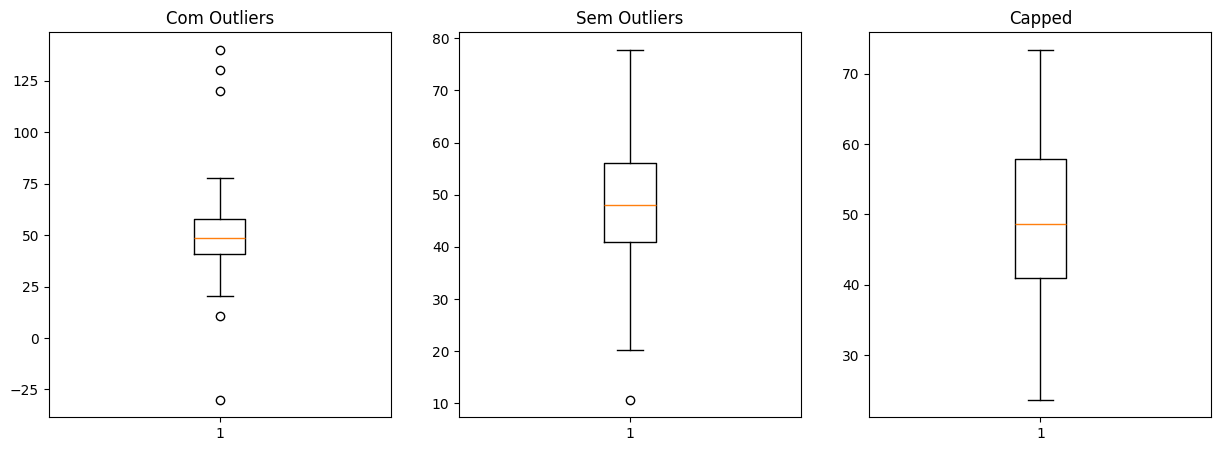

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Criando dados com outliers
np.random.seed(42)
dados_normais = np.random.normal(50, 15, 100)
outliers = np.array([120, 130, -30, 140])
dados_com_outliers = np.concatenate([dados_normais, outliers])

df = pd.DataFrame({'valor': dados_com_outliers})

# Detecção de outliers
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

outliers_iqr = detectar_outliers_iqr(df, 'valor')
print("Outliers detectados (IQR):")
print(outliers_iqr)

# Métodos de tratamento
# 1. Winsorization
dados_winsorized = stats.mstats.winsorize(df['valor'], limits=[0.05, 0.05])

# 2. Remoção
df_sem_outliers = df[(np.abs(stats.zscore(df['valor'])) < 3)]

# 3. Capping
def cap_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.05)
    Q3 = df[coluna].quantile(0.95)
    df[coluna] = np.where(df[coluna] < Q1, Q1, df[coluna])
    df[coluna] = np.where(df[coluna] > Q3, Q3, df[coluna])
    return df

df_capped = cap_outliers(df.copy(), 'valor')

# Visualização
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df['valor'])
plt.title('Com Outliers')

plt.subplot(1, 3, 2)
plt.boxplot(df_sem_outliers['valor'])
plt.title('Sem Outliers')

plt.subplot(1, 3, 3)
plt.boxplot(df_capped['valor'])
plt.title('Capped')
plt.show()

# Categorização de variáveis contínuas e discretas

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, KBinsDiscretizer

# Dados de exemplo
data = {
    'idade': [18, 25, 35, 45, 55, 65, 22, 30, 40, 50],
    'salario': [2000, 3000, 5000, 7000, 9000, 11000, 2500, 3500, 6000, 8000],
    'cidade': ['SP', 'RJ', 'SP', 'MG', 'RJ', 'SP', 'MG', 'RJ', 'SP', 'MG'],
    'ativo': ['sim', 'não', 'sim', 'não', 'sim', 'não', 'sim', 'não', 'sim', 'não']
}

df = pd.DataFrame(data)

# Categorização de variáveis contínuas
# 1. Discretização por bins
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['idade_categoria'] = discretizer.fit_transform(df[['idade']]).astype(int)

# 2. Discretização manual
df['faixa_etaria'] = pd.cut(df['idade'], 
                           bins=[0, 30, 40, 100], 
                           labels=['Jovem', 'Adulto', 'Senior'])

# Codificação de variáveis categóricas
# 1. Label Encoding
le = LabelEncoder()
df['cidade_encoded'] = le.fit_transform(df['cidade'])

# 2. One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=['cidade', 'ativo'], prefix=['city', 'active'])

print("Dataset original:")
print(df[['idade', 'salario', 'cidade', 'ativo']].head())
print("\nApós categorização:")
print(df[['idade', 'faixa_etaria', 'cidade_encoded']].head())
print("\nApós One-Hot Encoding:")
print(df_onehot.head())

Dataset original:
   idade  salario cidade ativo
0     18     2000     SP   sim
1     25     3000     RJ   não
2     35     5000     SP   sim
3     45     7000     MG   não
4     55     9000     RJ   sim

Após categorização:
   idade faixa_etaria  cidade_encoded
0     18        Jovem               2
1     25        Jovem               1
2     35       Adulto               2
3     45       Senior               0
4     55       Senior               1

Após One-Hot Encoding:
   idade  salario  idade_categoria faixa_etaria  cidade_encoded  city_MG  \
0     18     2000                0        Jovem               2        0   
1     25     3000                0        Jovem               1        0   
2     35     5000                1       Adulto               2        0   
3     45     7000                1       Senior               0        1   
4     55     9000                2       Senior               1        0   

   city_RJ  city_SP  active_não  active_sim  
0        0        1 

# PCA

Variância explicada por cada componente: [0.72962445 0.22850762]
Variância total explicada: 0.9581320720000164


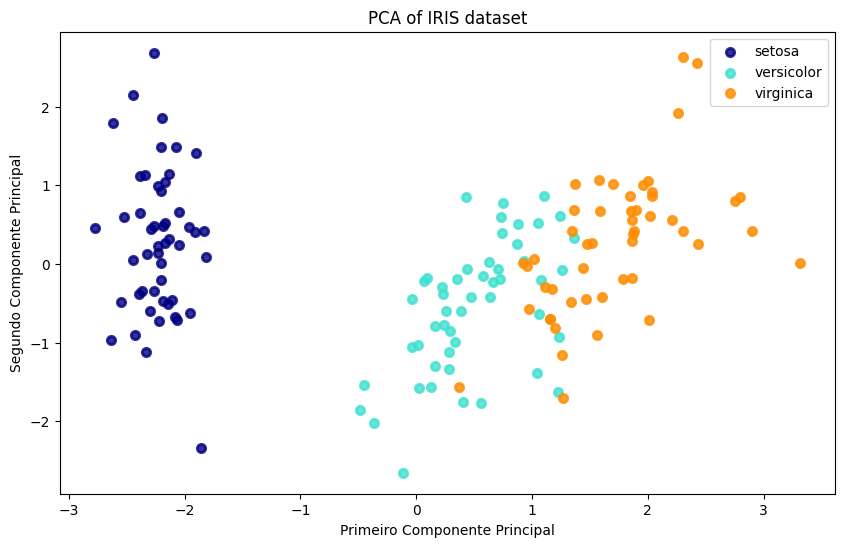

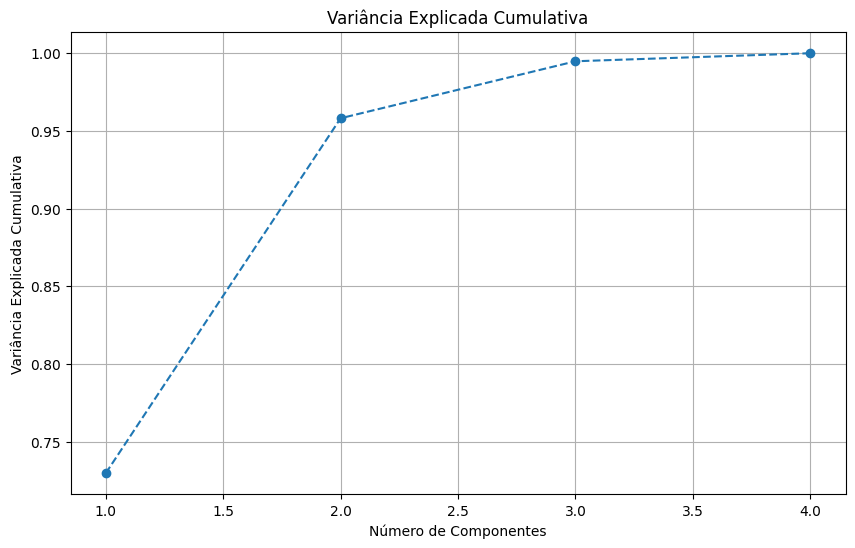

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Carregando dados
iris = load_iris()
X = iris.data
y = iris.target

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Resultados
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", sum(pca.explained_variance_ratio_))

# Visualização
plt.figure(figsize=(10, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
               color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()

# PCA para redução de dimensionalidade
pca_full = PCA()
pca_full.fit(X_scaled)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('Variância Explicada Cumulativa')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.grid(True)
plt.show()

# Correlação / associação entre dados contínuos e discretos

Matriz de correlação (Pearson):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  

Matriz de correlação (Spearman):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.166778           0.881898   
sepal width (cm)           -0

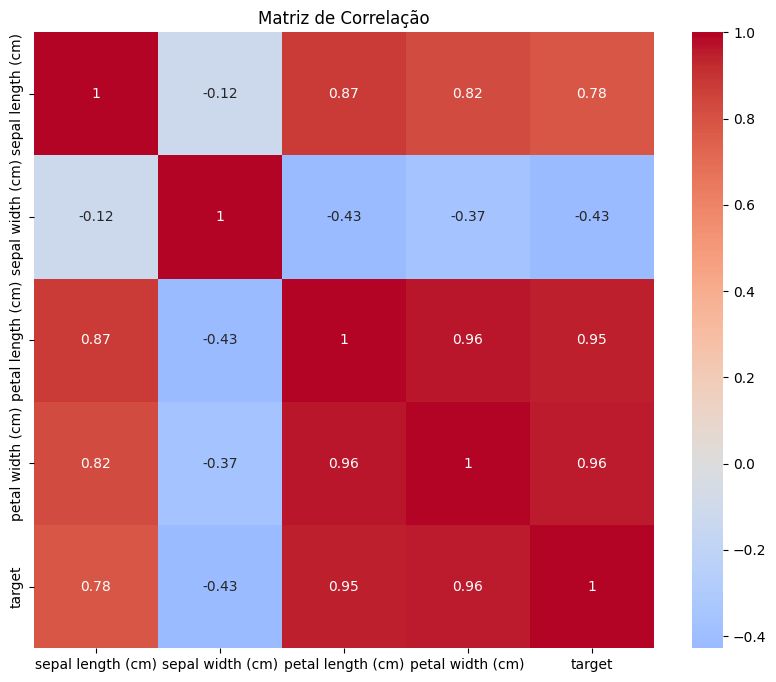


Teste Qui-quadrado: chi2=115.984, p-value=0.0000
V de Cramer: 0.615


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from sklearn.datasets import load_iris

# Dados de exemplo
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Correlação entre variáveis contínuas
print("Matriz de correlação (Pearson):")
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

# Correlação de Spearman para relações não-lineares
print("\nMatriz de correlação (Spearman):")
spearman_matrix = df.corr(method='spearman')
print(spearman_matrix)

# Teste de significância
corr, p_value = pearsonr(df['sepal length (cm)'], df['petal length (cm)'])
print(f"\nCorrelação Pearson: {corr:.3f}, p-value: {p_value:.4f}")

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# Para variáveis discretas - Teste Qui-quadrado
# Criando variáveis categóricas para exemplo
df['sepal_length_cat'] = pd.cut(df['sepal length (cm)'], bins=3, labels=['Pequeno', 'Médio', 'Grande'])
df['petal_length_cat'] = pd.cut(df['petal length (cm)'], bins=3, labels=['Pequeno', 'Médio', 'Grande'])

# Tabela de contingência
contingency_table = pd.crosstab(df['sepal_length_cat'], df['petal_length_cat'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nTeste Qui-quadrado: chi2={chi2:.3f}, p-value={p:.4f}")

# Coeficiente V de Cramer (medida de associação)
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_value = cramers_v(contingency_table)
print(f"V de Cramer: {cramers_v_value:.3f}")

# Seleção de variáveis

Top 10 features por ANOVA F-value:
                 feature       score        p_value
27  worst concave points  964.385393  1.969100e-124
22       worst perimeter  897.944219  5.771397e-119
7    mean concave points  861.676020  7.101150e-116
20          worst radius  860.781707  8.482292e-116
2         mean perimeter  697.235272  8.436251e-101
23            worst area  661.600206   2.828848e-97
0            mean radius  646.981021   8.465941e-96
3              mean area  573.060747   4.734564e-88
6         mean concavity  533.793126   9.966556e-84
26       worst concavity  436.691939   2.464664e-72

Top 10 features por importância (Random Forest):
                 feature  importance
23            worst area    0.139357
27  worst concave points    0.132225
7    mean concave points    0.107046
20          worst radius    0.082848
22       worst perimeter    0.080850
2         mean perimeter    0.067990
6         mean concavity    0.066917
3              mean area    0.060462
26       w

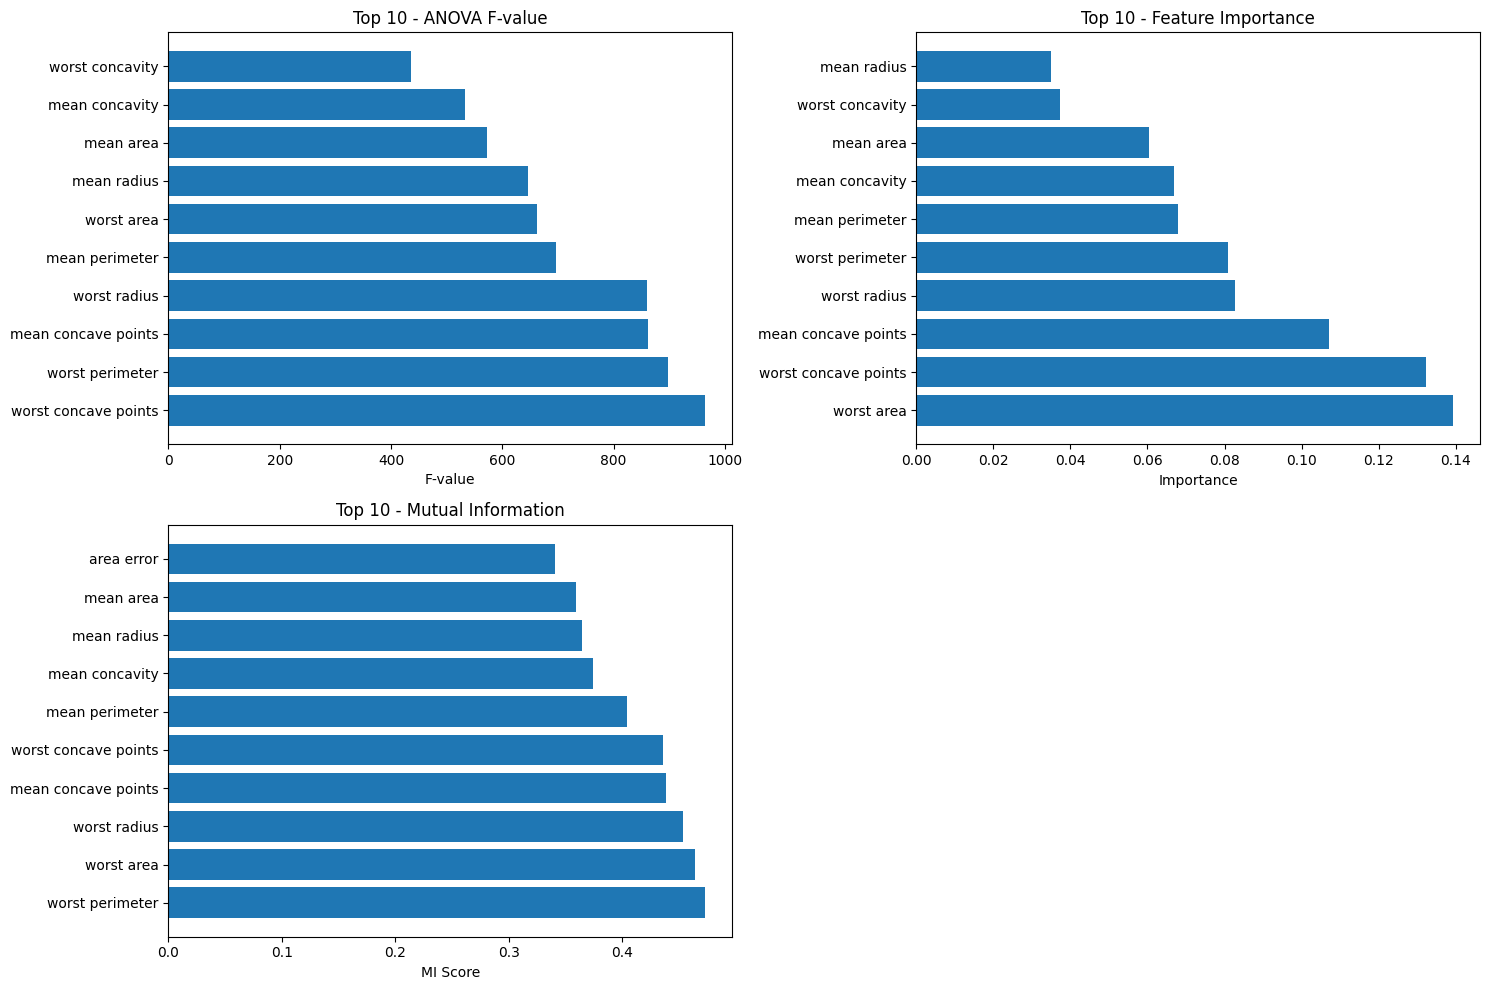


Top 10 features por método combinado:
22    2.125552
20    1.784393
27    1.596794
23    1.445815
7     1.419822
2     0.992821
6     0.852671
0     0.695867
3     0.669993
26    0.478947
Name: combinado, dtype: float64


In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import (SelectKBest, f_classif, RFE, 
                                     SelectFromModel, mutual_info_classif)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregando dados
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Seleção baseada em correlação com target
selector_corr = SelectKBest(score_func=f_classif, k=10)
X_selected_corr = selector_corr.fit_transform(X_scaled, y)

# Scores das features
feature_scores = pd.DataFrame({
    'feature': data.feature_names,
    'score': selector_corr.scores_,
    'p_value': selector_corr.pvalues_
}).sort_values('score', ascending=False)

print("Top 10 features por ANOVA F-value:")
print(feature_scores.head(10))

# 2. Seleção baseada em importância de features (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 features por importância (Random Forest):")
print(feature_importance.head(10))

# 3. Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=10)
X_selected_rfe = rfe.fit_transform(X_scaled, y)

print("\nFeatures selecionadas por RFE:")
selected_features_rfe = [data.feature_names[i] for i in range(len(data.feature_names)) if rfe.support_[i]]
print(selected_features_rfe)

# 4. Seleção baseada em mutual information
mi_scores = mutual_info_classif(X_scaled, y)
mi_features = pd.DataFrame({
    'feature': data.feature_names,
    'mi_score': mi_scores
}).sort_values('mi_score', ascending=False)

print("\nTop 10 features por Mutual Information:")
print(mi_features.head(10))

# Visualização comparativa
plt.figure(figsize=(15, 10))

# ANOVA F-values
plt.subplot(2, 2, 1)
plt.barh(feature_scores['feature'][:10], feature_scores['score'][:10])
plt.title('Top 10 - ANOVA F-value')
plt.xlabel('F-value')

# Feature Importance
plt.subplot(2, 2, 2)
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 - Feature Importance')
plt.xlabel('Importance')

# Mutual Information
plt.subplot(2, 2, 3)
plt.barh(mi_features['feature'][:10], mi_features['mi_score'][:10])
plt.title('Top 10 - Mutual Information')
plt.xlabel('MI Score')

plt.tight_layout()
plt.show()

# Método combinado
def selecao_combinada(X, y, n_features=10):
    # Combinando scores de diferentes métodos
    methods = {
        'anova': SelectKBest(f_classif, k='all').fit(X, y).scores_,
        'mi': mutual_info_classif(X, y),
        'rf_importance': RandomForestClassifier().fit(X, y).feature_importances_
    }
    
    # Normalizando scores
    scores_df = pd.DataFrame(methods)
    scores_df = (scores_df - scores_df.mean()) / scores_df.std()
    
    # Score combinado
    scores_df['combinado'] = scores_df.mean(axis=1)
    
    return scores_df['combinado'].sort_values(ascending=False).head(n_features)

top_features = selecao_combinada(X_scaled, y, 10)
print("\nTop 10 features por método combinado:")
print(top_features)